### Import Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Reading the Dataset

* date : dates
* precipitation : All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle
* temp_max : Maximum Temperature
* temp_min : Minimum Temperature
* wind : Wind speed
* weather : weathers types

In [93]:
#Load the dataset
data = pd.read_csv("weather.csv")

In [95]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [97]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


### Exploratory Data Analysis

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [102]:
#Check for null values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [104]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [106]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [108]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

### Data Visualization

In [111]:
data['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

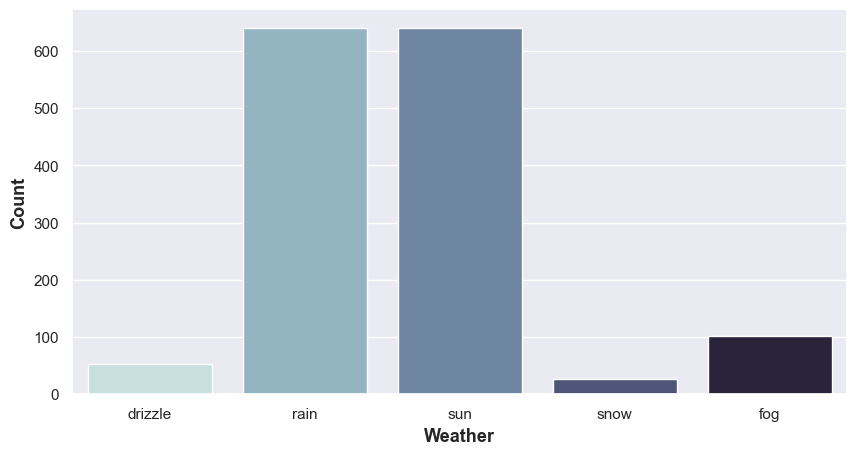

In [113]:
plt.figure(figsize=(10, 5))
sns.set_theme()
sns.countplot(x='weather', data=data, hue='weather', palette="ch:start=.2,rot=-.3", legend=False)
plt.xlabel("Weather", fontweight='bold', size=13)
plt.ylabel("Count", fontweight='bold', size=13)
plt.show()


In [115]:
import plotly.express as px

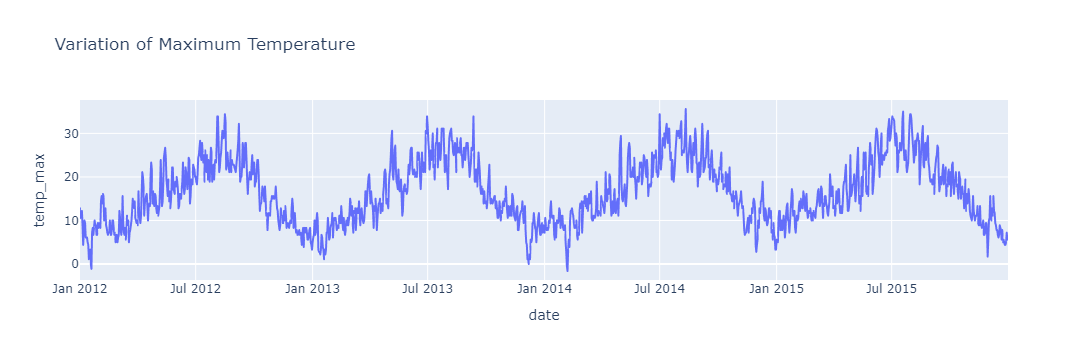

In [117]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_max', 
       title = 'Variation of Maximum Temperature')

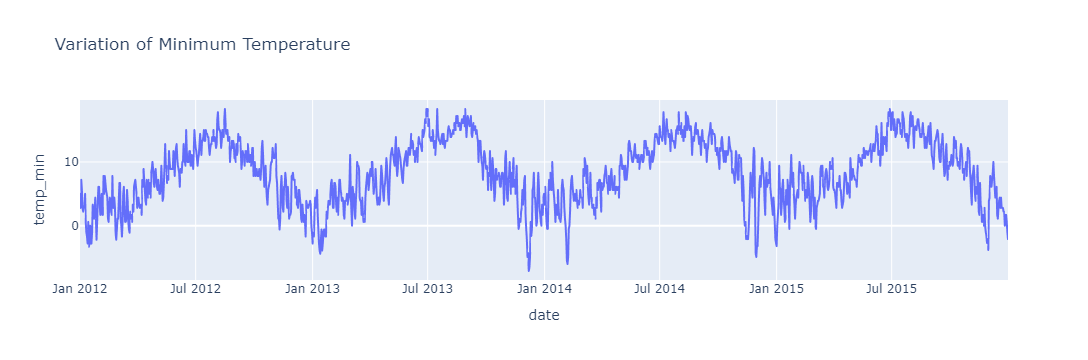

In [118]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_min', 
       title = 'Variation of Minimum Temperature')

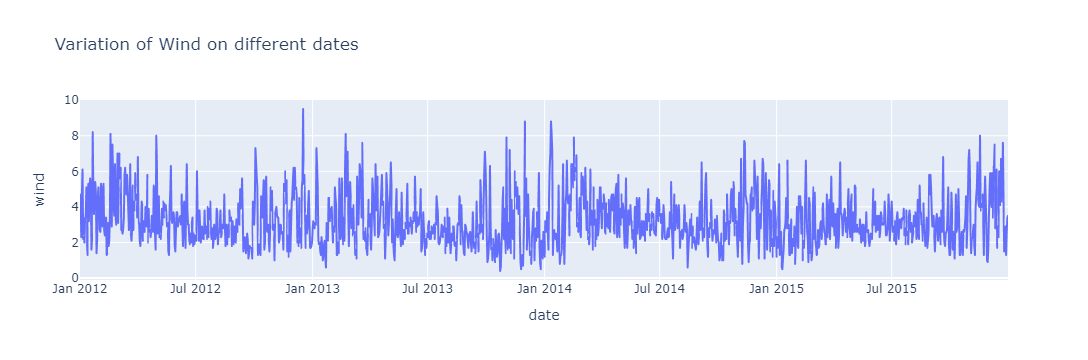

In [120]:
px.line(data_frame = data,
       x = 'date',
       y = 'wind', 
       title = 'Variation of Wind on different dates')

<Figure size 1400x800 with 0 Axes>

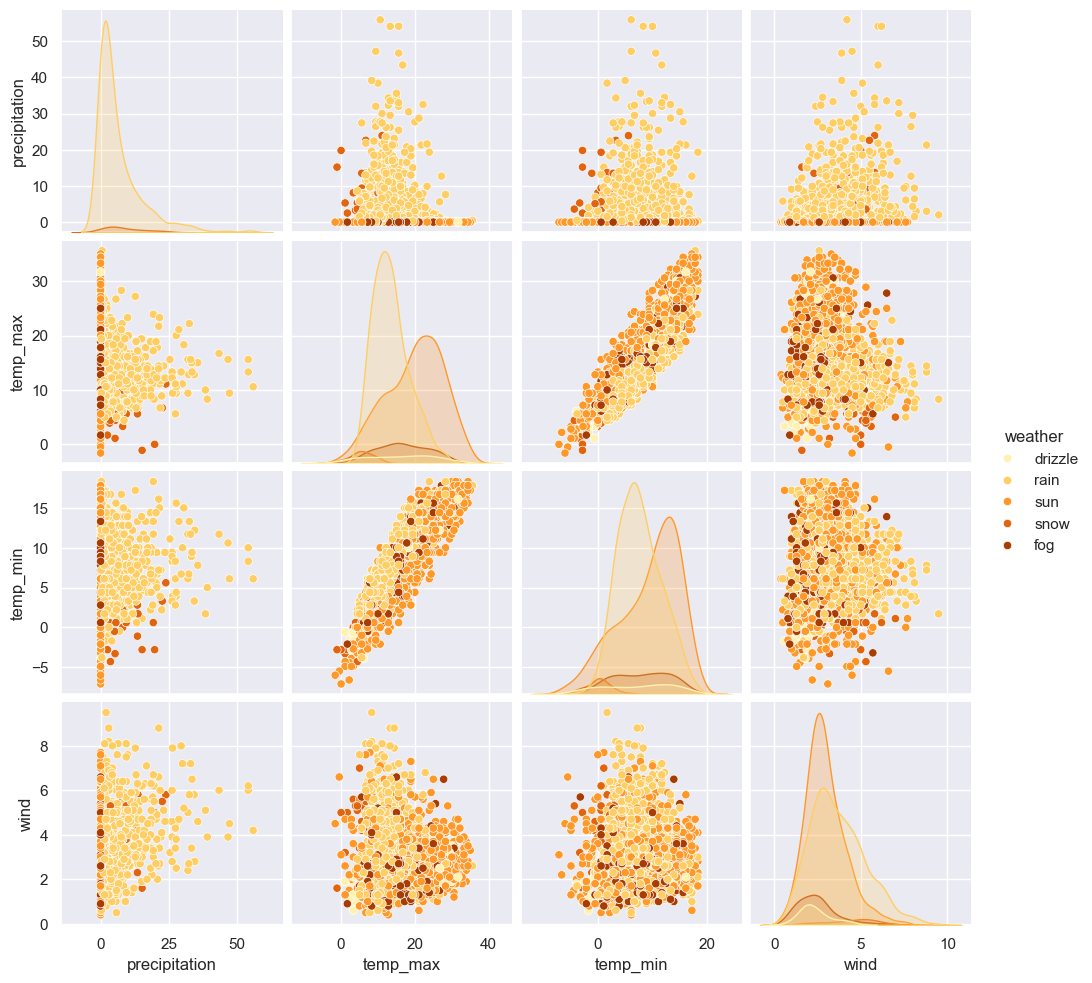

In [123]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

<Figure size 1000x500 with 0 Axes>

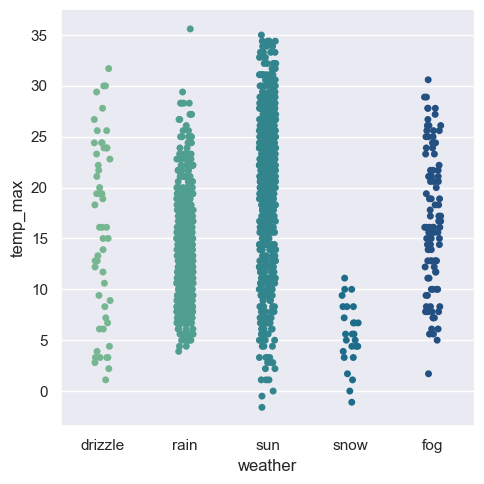

In [124]:
plt.figure(figsize=(10, 5))
sns.catplot(x='weather', y='temp_max', data=data, hue='weather', palette="crest", legend=False)
plt.show()

<Figure size 1000x500 with 0 Axes>

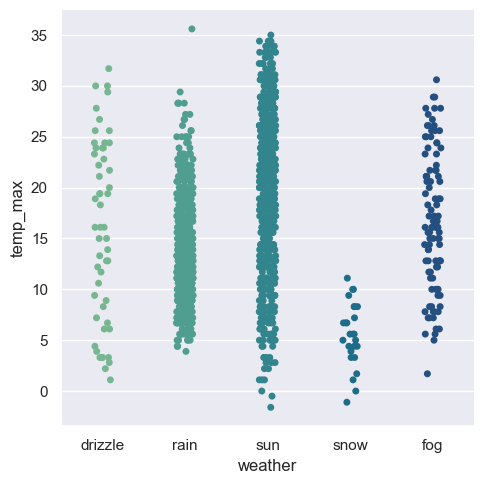

In [125]:
plt.figure(figsize=(10, 5))
sns.catplot(x='weather', y='temp_max', data=data, hue='weather', palette="crest", legend=False)
plt.show()

### Data Preprocessing

In [127]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")

In [132]:
data = data.drop('date',axis=1)

In [134]:
x = data.drop('weather',axis=1)
y = data['weather']

### Train Test Split

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [144]:
y_pred = classifier.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

Accuracy score: 0.7622950819672131


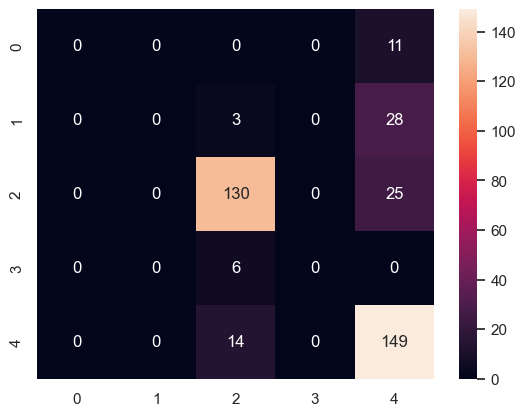

In [148]:
sns.heatmap(cm,annot=True, fmt = '.3g')
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")
plt.show()

### SVM

In [151]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predictions

In [64]:
y_pred = classifier.predict(X_test)

Accuracy Score 0.7950819672131147


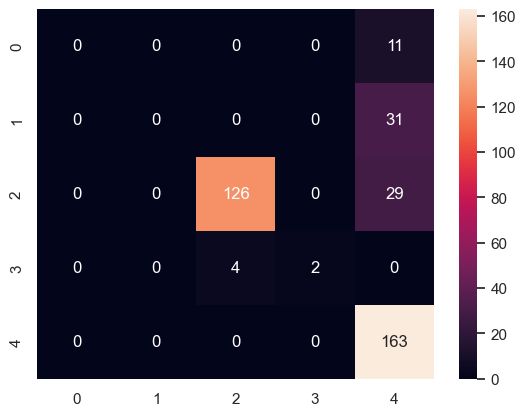

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '0.3g')
print("Accuracy Score" ,accuracy_score(y_test, y_pred))

### Naive Bayes 

In [69]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred = classifier.predict(X_test)

Accuracy score : 0.8415300546448088


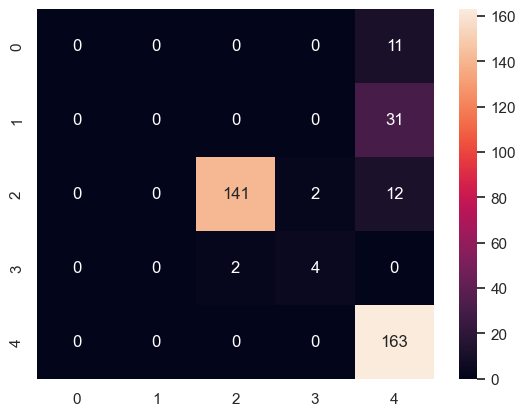

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc}")